## Exploaratory Data Analysis -EDA
EDA with python using Forbes 2022 dataset.
<b>Table of contents:</b>
<ul>
<li><a href="#load">Loading the dataset</a></li>  
<li><a href="#preprocessing">Data preprocessing</a></li>
<li><a href="#gender">Gender analysis</a></li>
<li><a href="#richest">Top 10 richest in the world</a></li>
<li><a href="#countries">Top 10 countries</a></li>
<li><a href="#categories">Top 10 categories</a></li>
<li><a href="#money-age">The relationship between money and age</a></li>      
<li><a href="#age">The distribution of age</a></li>        

In [26]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id="load"></a>
## Loading the dataset
Load the dataset with the `read_csv` method in Pandas.

In [2]:
# load data set using the pandas read_csv method
df = pd.read_csv("forbes_2022.csv")
#show the first 5 rows
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,28/06/1971,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,12/01/1964,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,05/03/1949,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,28/10/1955,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,30/08/1930,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


<a id="preprocessing"></a>
## Data Preprocessing


In [3]:
# check shape of the dataset
df.shape

(2668, 22)

In [4]:
# check types of columns
df.dtypes


rank                      int64
personName               object
age                     float64
finalWorth                int64
year                      int64
month                     int64
category                 object
source                   object
country                  object
state                    object
city                     object
countryOfCitizenship     object
organization             object
selfMade                   bool
gender                   object
birthDate                object
title                    object
philanthropyScore       float64
residenceMsa             object
numberOfSiblings        float64
bio                      object
about                    object
dtype: object

the dataset has 2668 rows and 22 columns and contains both numerical and categorical values.

In [5]:
# select columns for analysis with the loc method
df = df.loc[:,["rank","personName","age","finalWorth","category","country","gender"]]
df.head()

,rank,personName,age,finalWorth,category,country,gender
0,1,Elon Musk,50.0,219000,Automotive,United States,M
1,2,Jeff Bezos,58.0,171000,Technology,United States,M
2,3,Bernard Arnault & family,73.0,158000,Fashion & Retail,France,M
3,4,Bill Gates,66.0,129000,Technology,United States,M
4,5,Warren Buffett,91.0,118000,Finance & Investments,United States,M


Note that the rank column consists of numbers. Let's convert this column into an index column with the `set` method._index

In [6]:
df = df.set_index('rank')
df.dtypes

personName     object
age           float64
finalWorth      int64
category       object
country        object
gender         object
dtype: object

In [7]:
df.head()

,personName,age,finalWorth,category,country,gender
rank,,,,,,
1,Elon Musk,50.0,219000,Automotive,United States,M
2,Jeff Bezos,58.0,171000,Technology,United States,M
3,Bernard Arnault & family,73.0,158000,Fashion & Retail,France,M
4,Bill Gates,66.0,129000,Technology,United States,M
5,Warren Buffett,91.0,118000,Finance & Investments,United States,M


Check for missing data in the columns with the `isnull` and `sum` methods.

In [8]:
df.isnull().sum()

personName     0
age           86
finalWorth     0
category       0
country       13
gender        15
dtype: int64

There are missing data in the age, country, and gender columns. Since there are not many missing data in these columns, let's remove these missing data with the `dropna` method.

In [ ]:
# df.dropna(inplace=True)

Let's take a look at the general information in the dataset with the `info` method

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2668 entries, 1 to 2578
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   personName  2668 non-null   object 
 1   age         2582 non-null   float64
 2   finalWorth  2668 non-null   int64  
 3   category    2668 non-null   object 
 4   country     2655 non-null   object 
 5   gender      2653 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 145.9+ KB


## Gender Analysis
Let's examine the gender of billionaires with the `value_counts` method.

In [14]:
df["gender"].value_counts()

M    2341
F     312
Name: gender, dtype: int64

Most billionaires are men. Let's look at the percentage of men and women with the `normalize=True` parameter.

In [17]:
df["gender"].value_counts(normalize=True)

M    0.882397
F    0.117603
Name: gender, dtype: float64

As you can see, 89 percent of billionaires are men and 11 percent are women. Let's look at the mean ages according to gender. To do this, I'm going to use the `groupby` method.

In [20]:
df_gender = df.groupby(["gender"])

Let's calculate the mean ages with the`mean` method.

In [24]:
df_gender["age"].mean()

gender
F    62.798611
M    64.392045
Name: age, dtype: float64

Let's draw a bar plot for the male and female averages. First, let me specify a seaborn theme. 

In [27]:
#sns.set_theme()
#sns.set(rc = {"figure.figsize":(12,8), "figure.dpi":300})

Text(0.5, 1.0, 'Average ages of men and women')

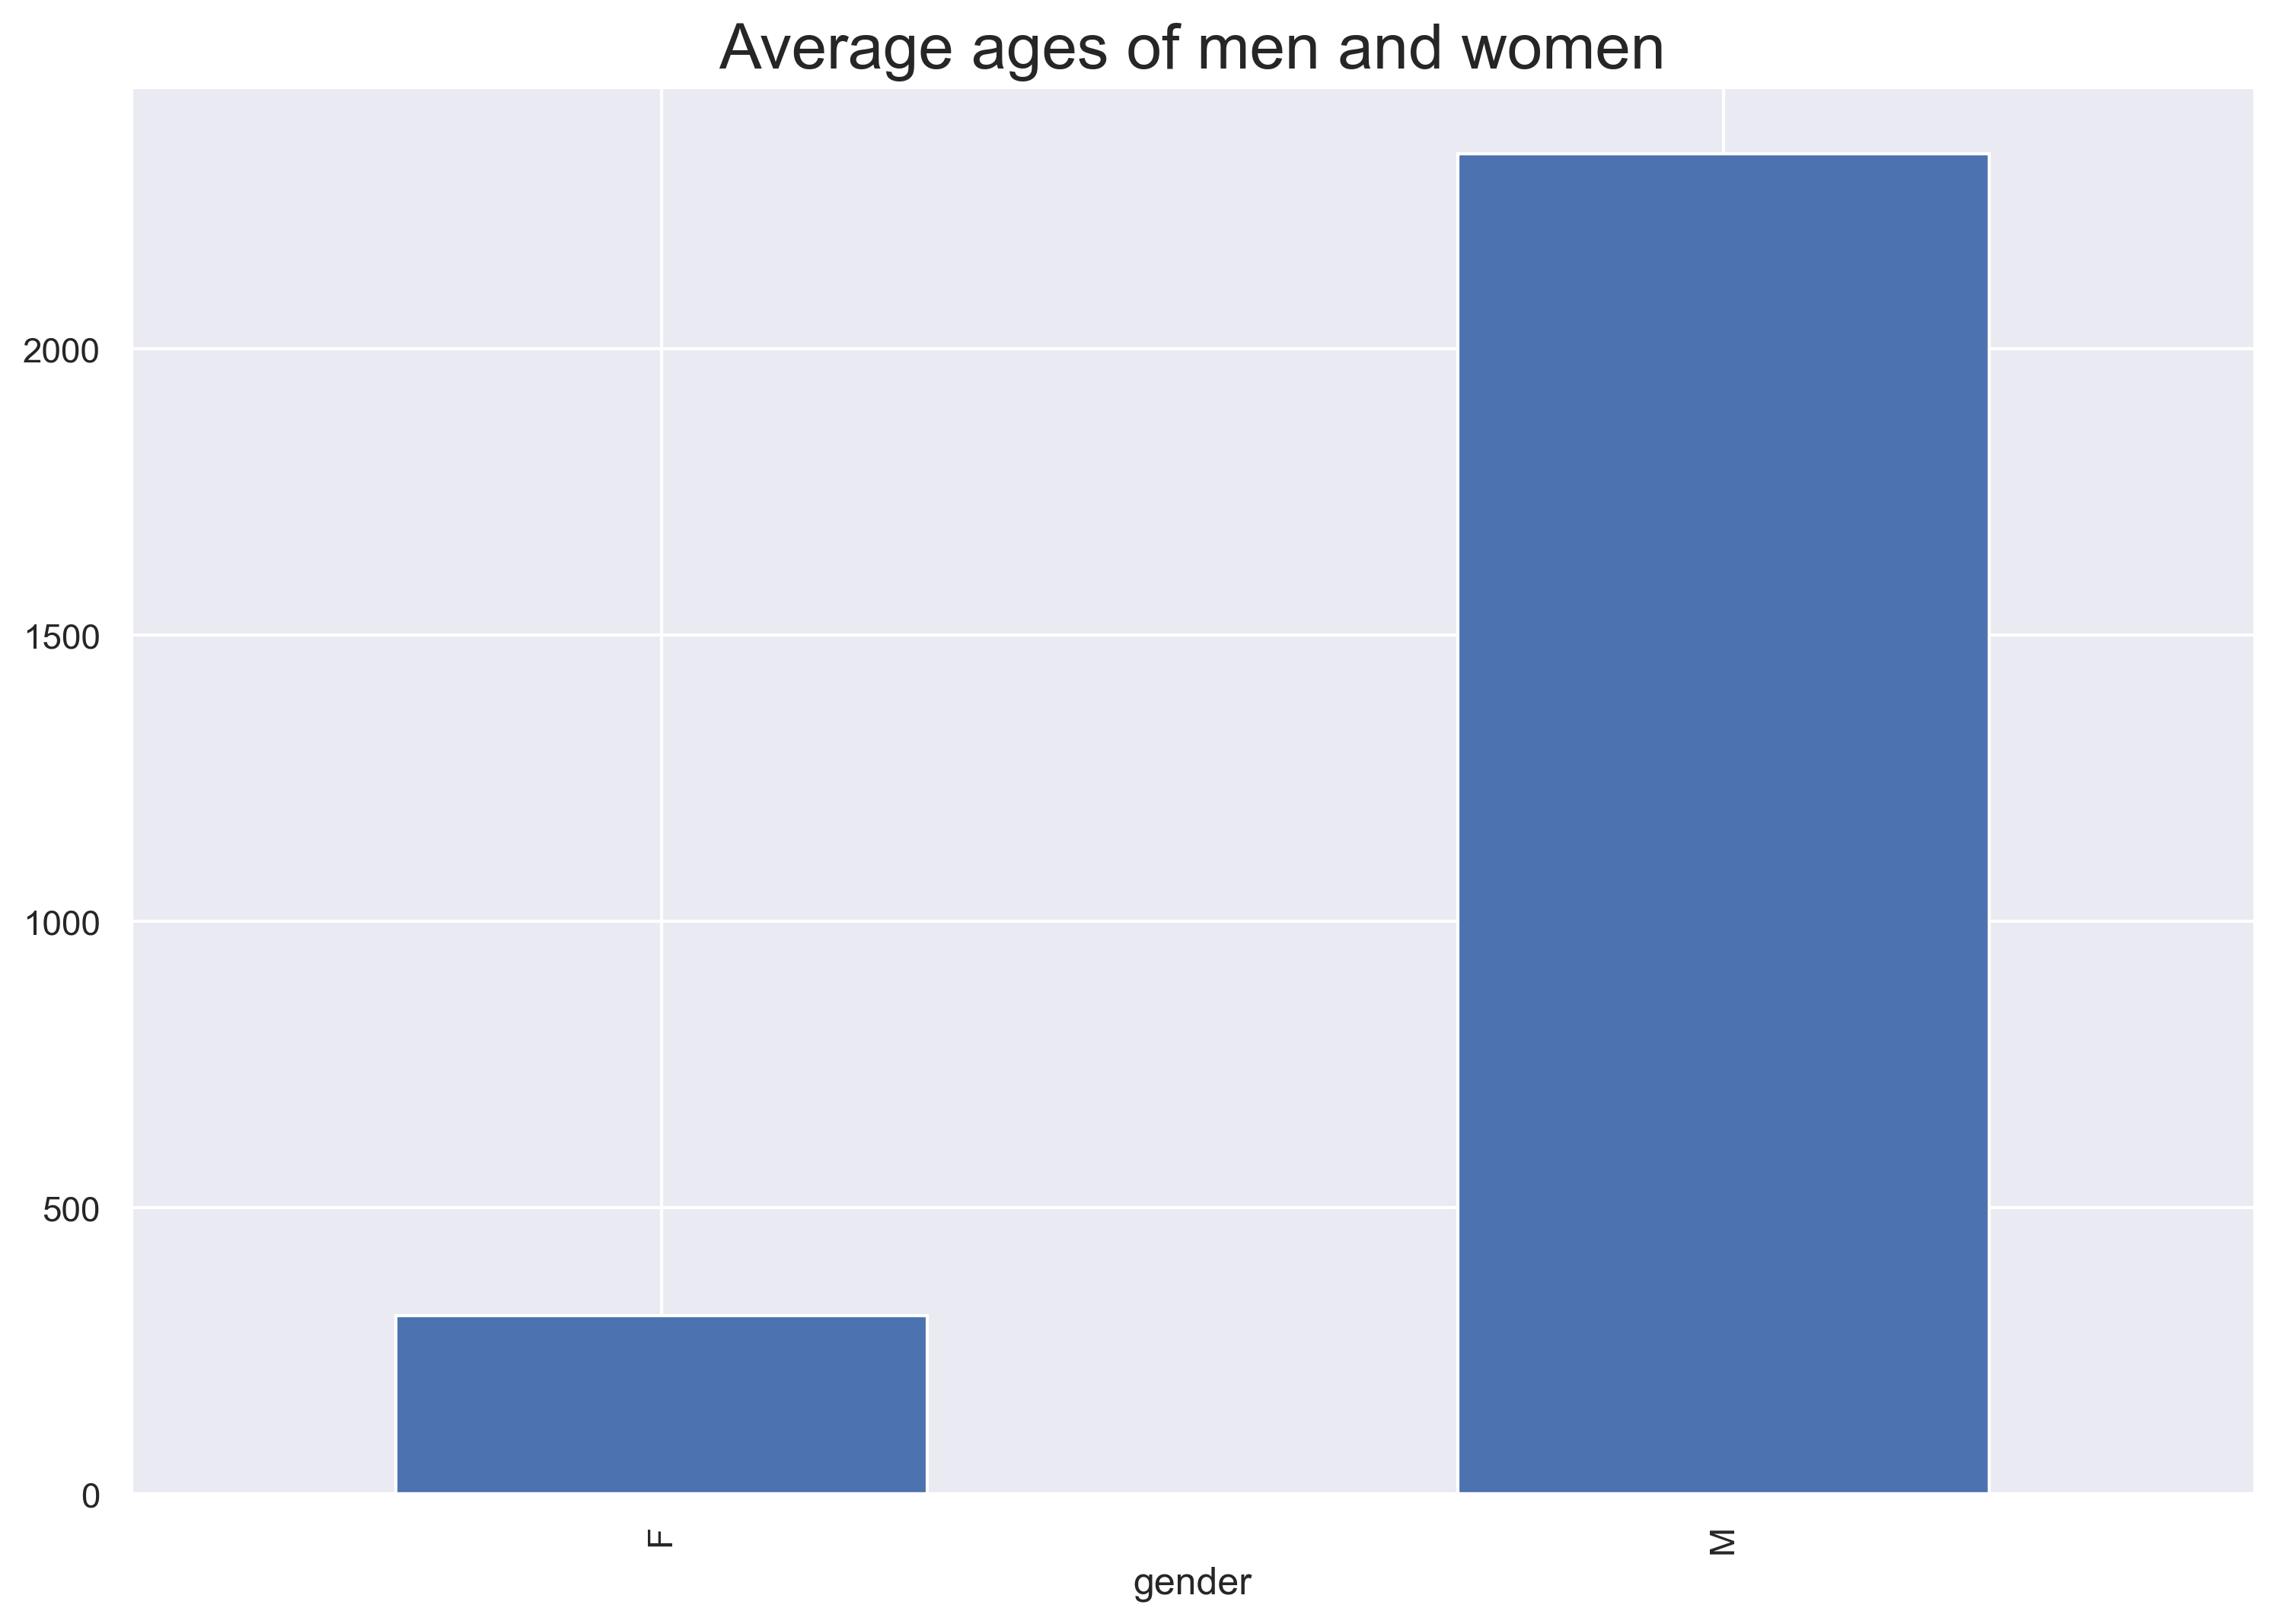

In [28]:
df_gender.size().plot(kind = "bar")
plt.title('Average ages of men and women', fontsize = 20)

Text(0.5, 1.0, 'Top 10 richest')

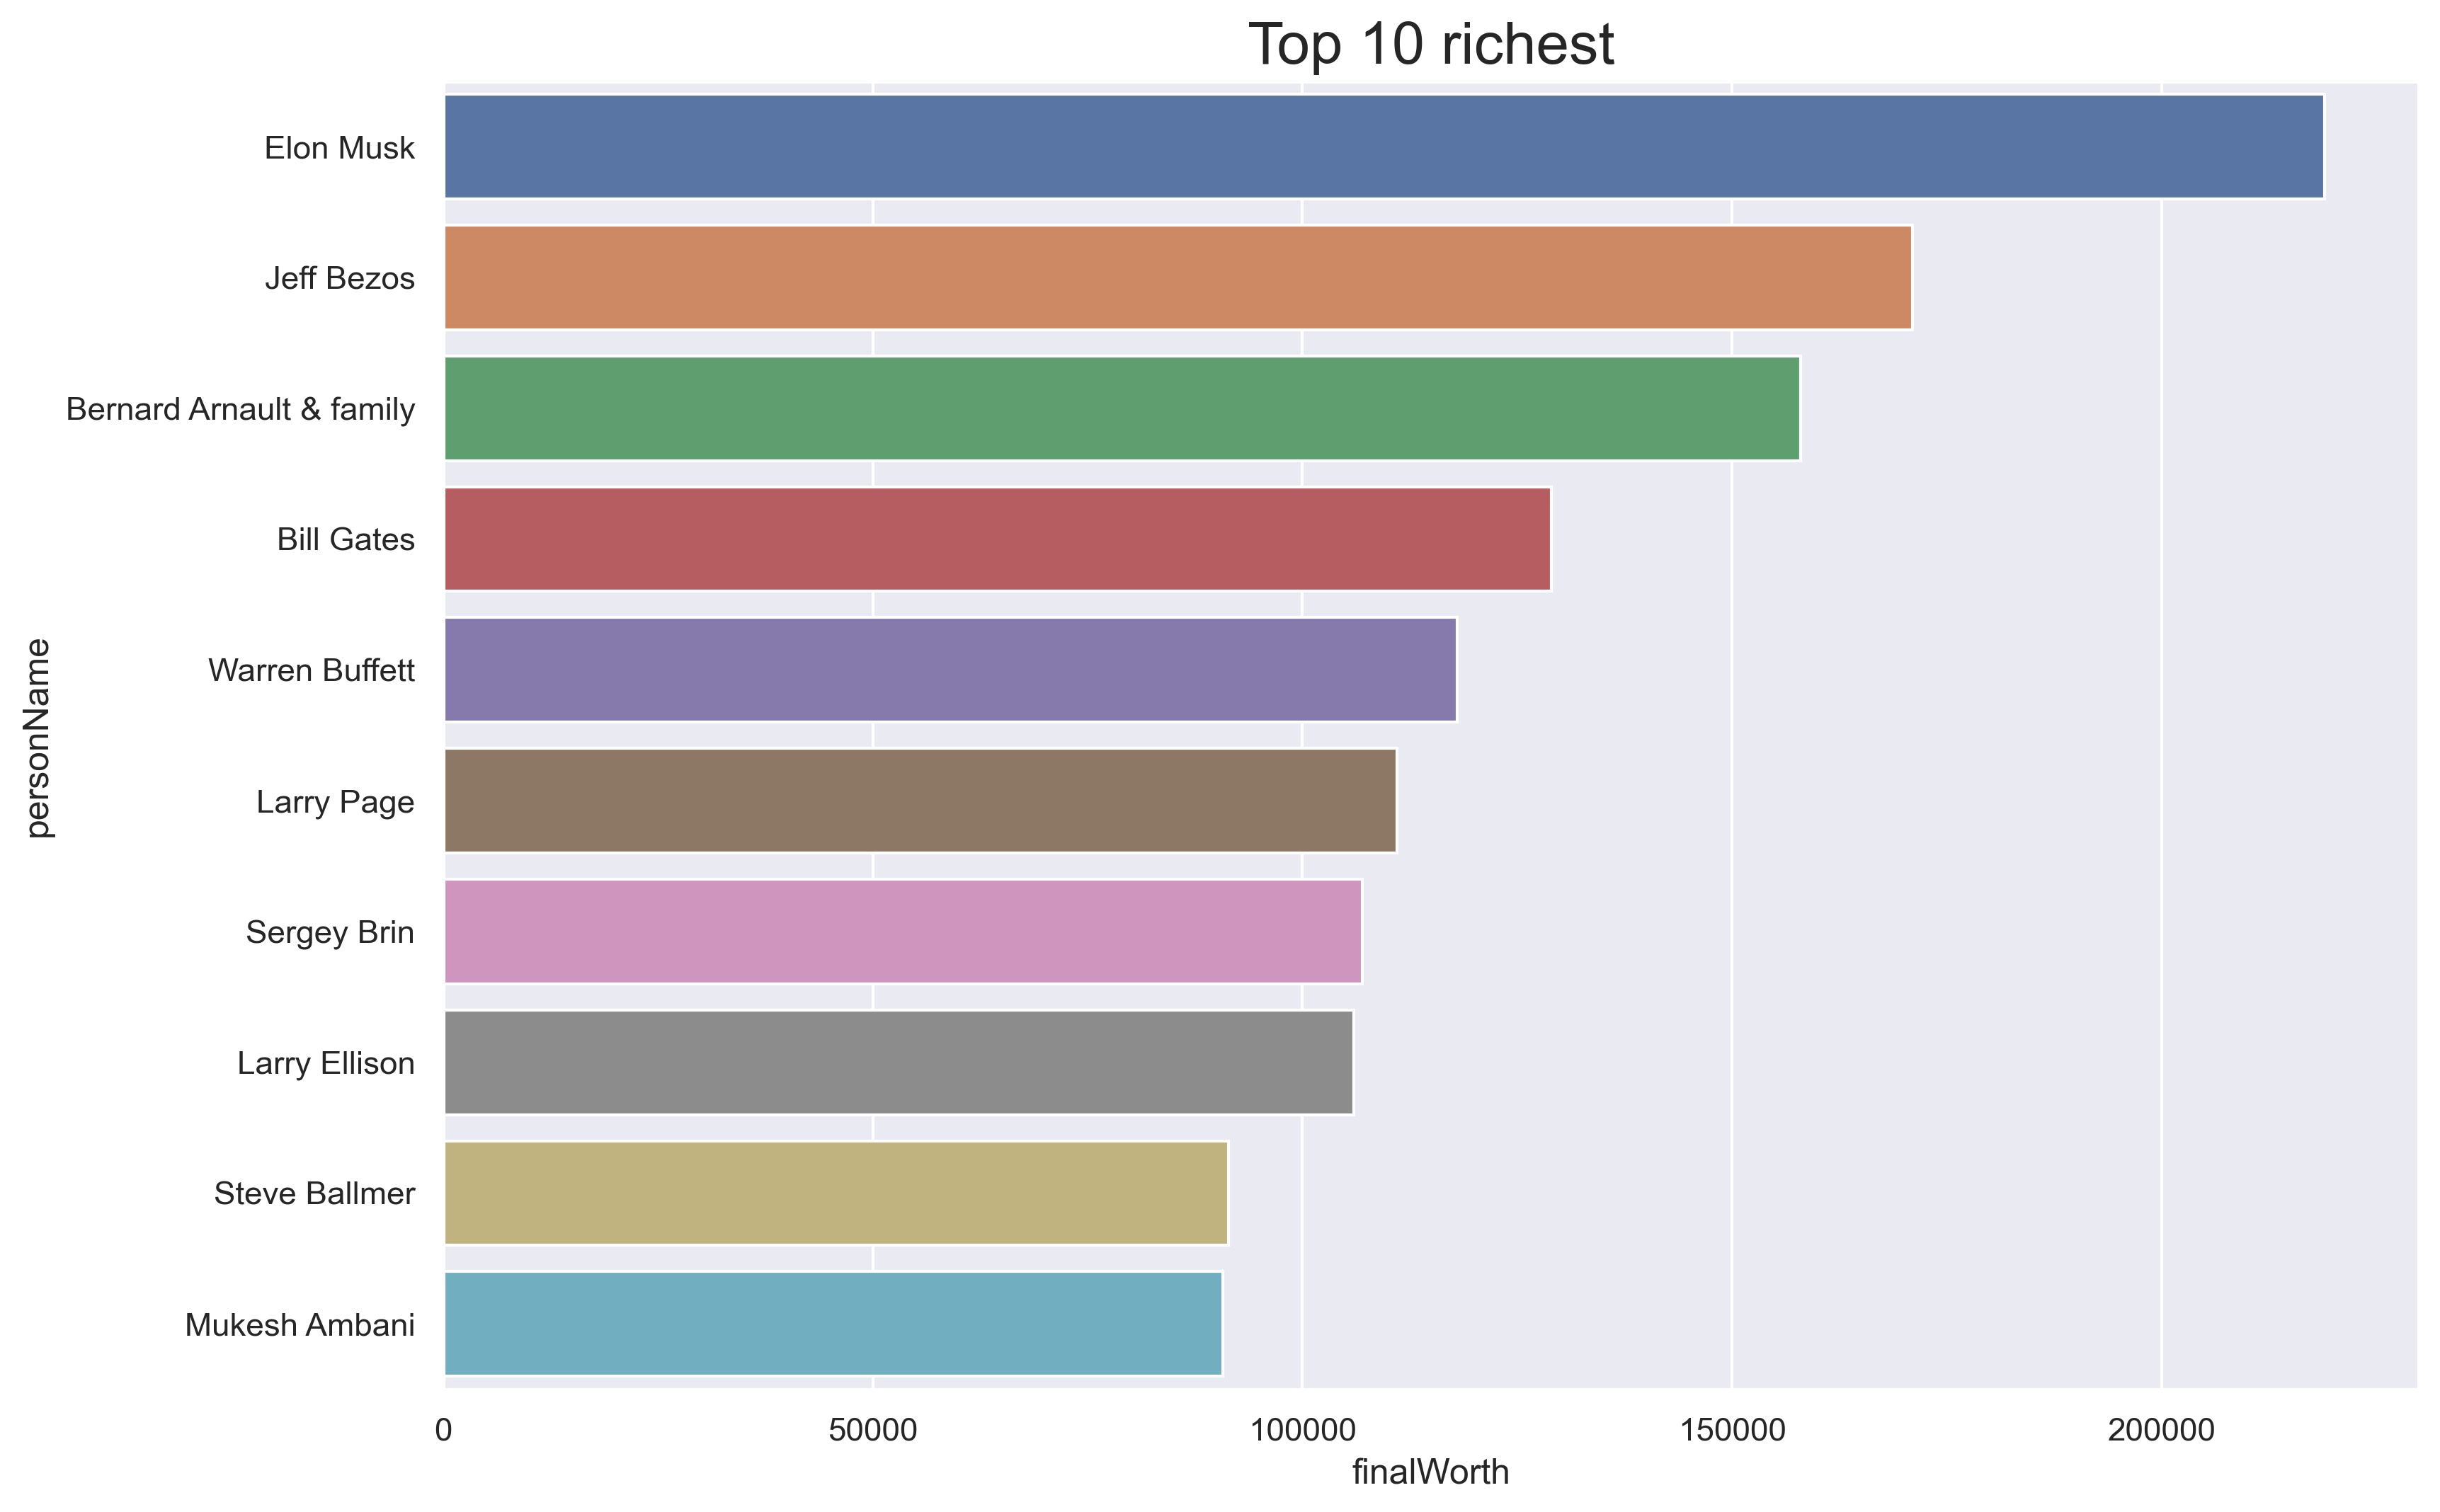

In [29]:
sns.barplot(y=df["personName"][:10], x = df["finalWorth"][:10])
plt.title('Top 10 richest', fontsize = 20)

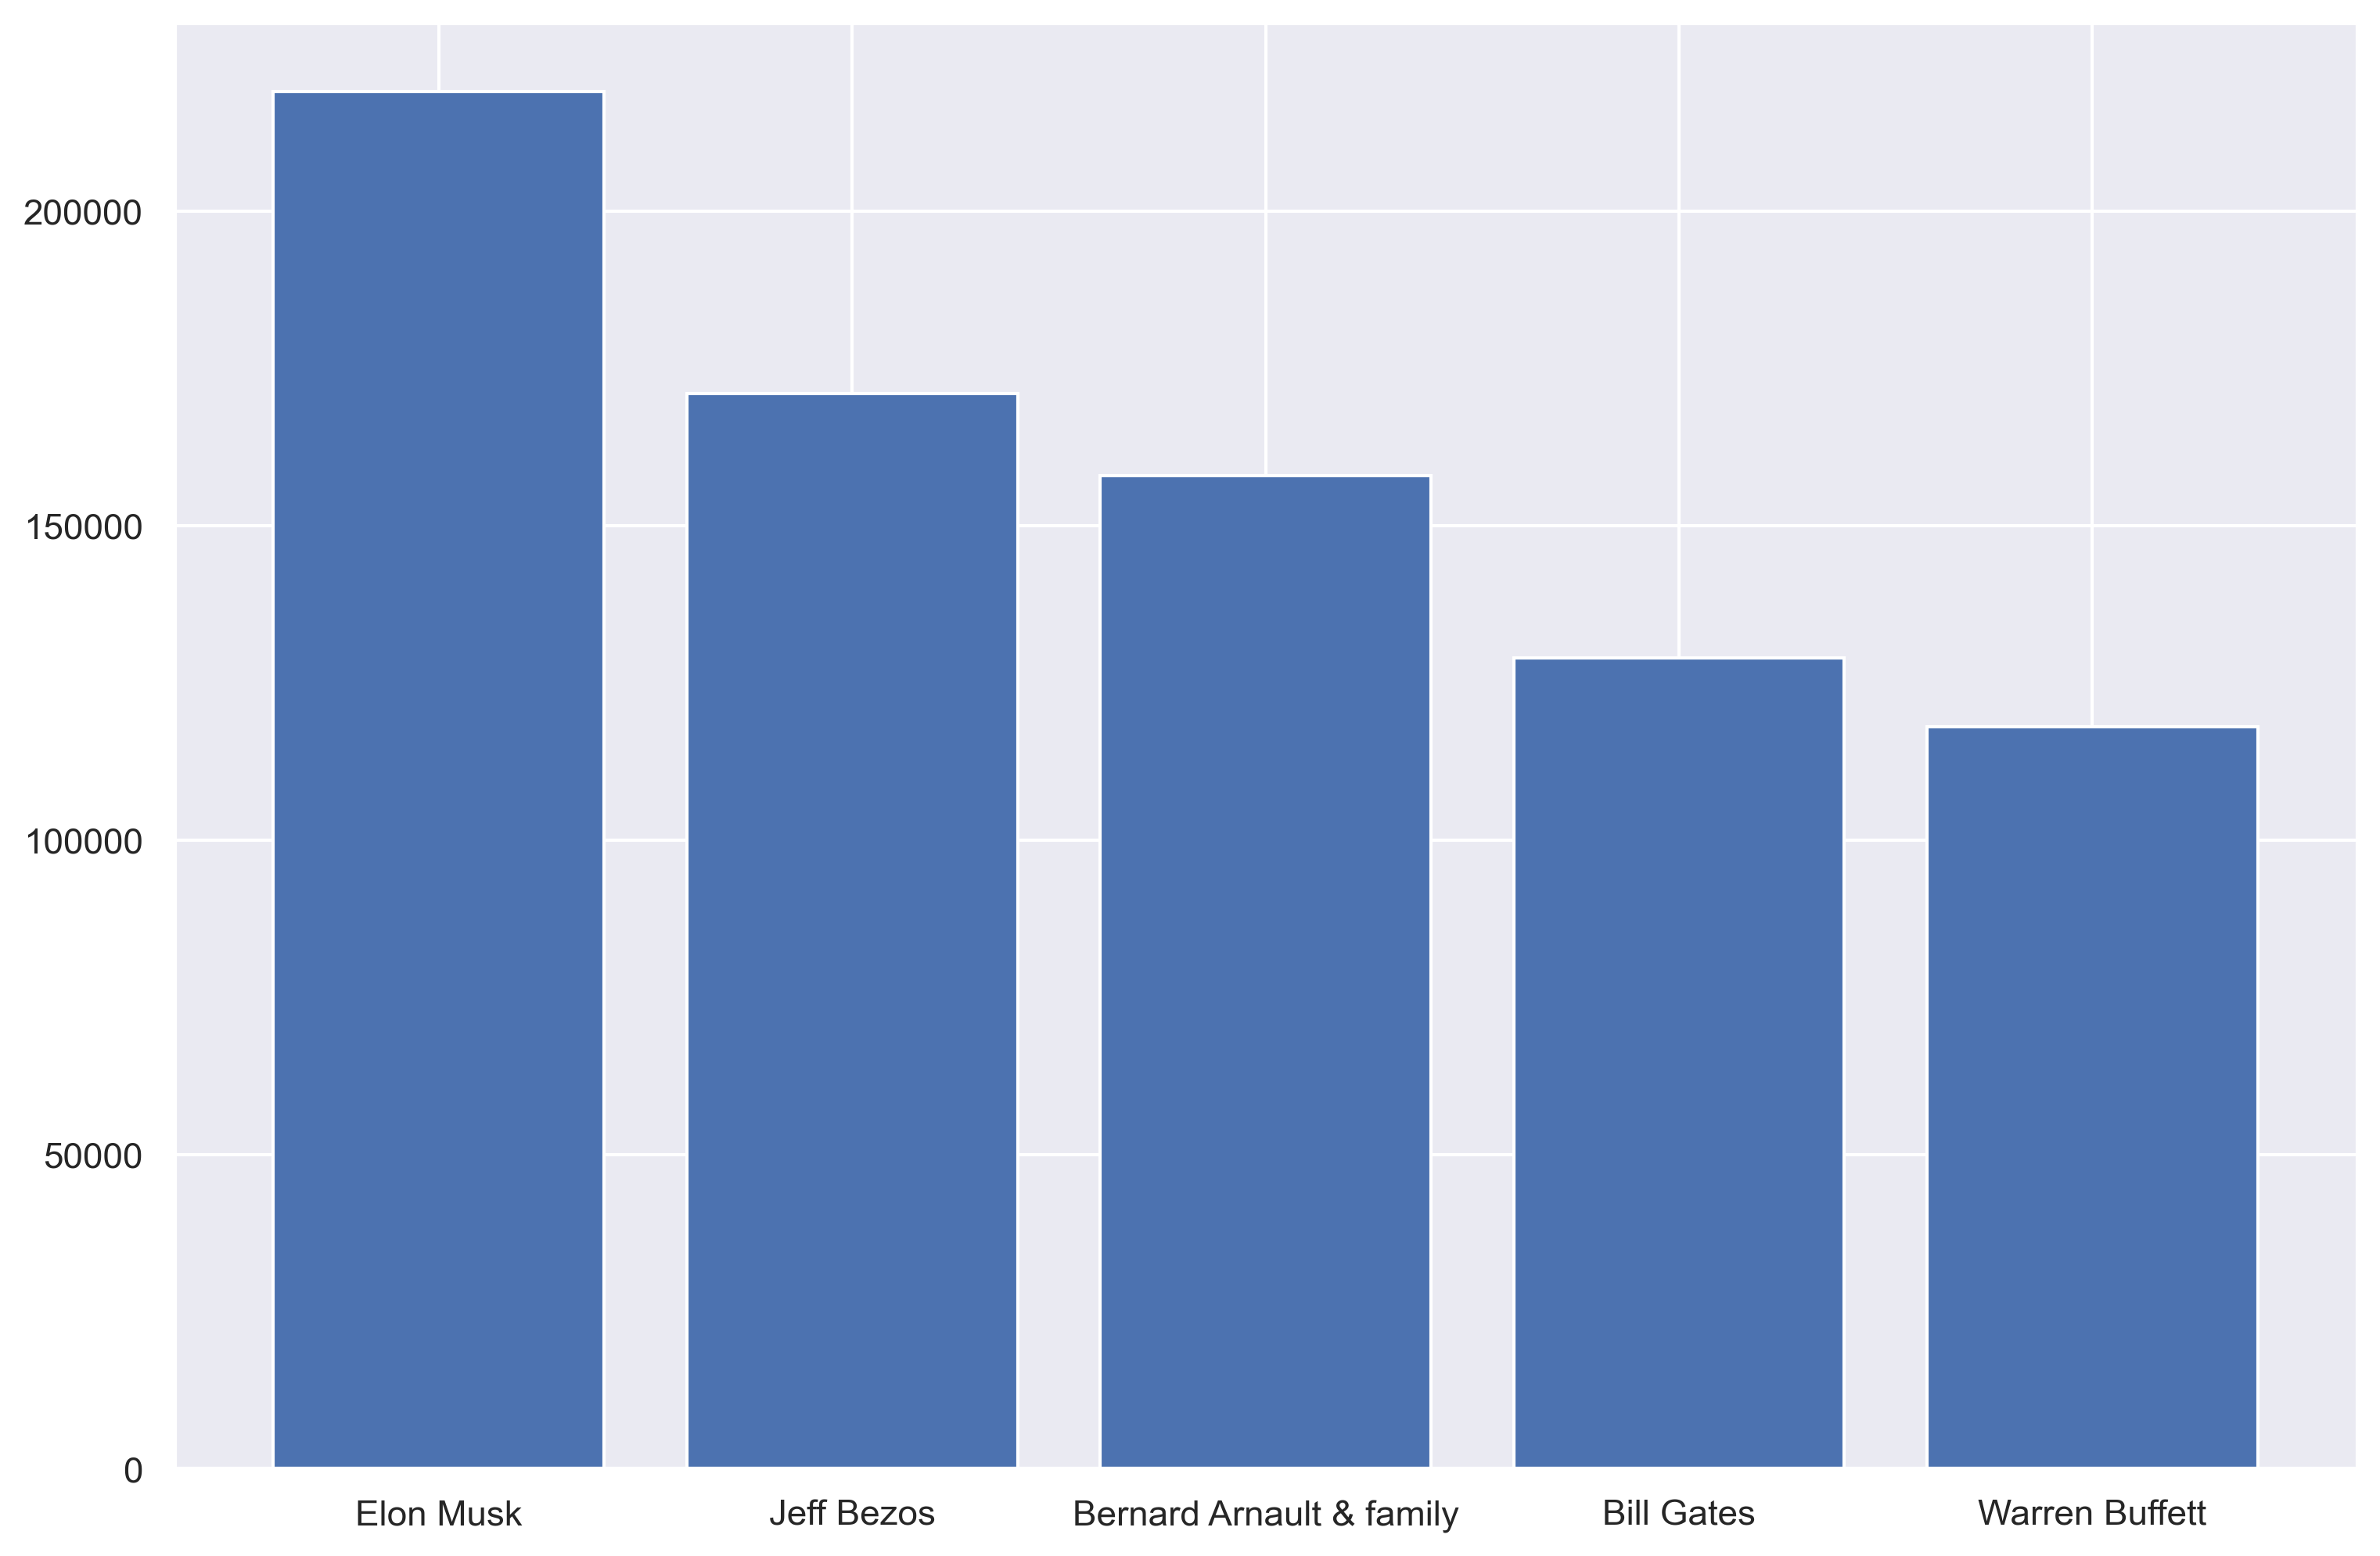

In [32]:
plt.bar(df["personName"][:5],df["finalWorth"][:5])
plt.show()